In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`


13-element Vector{String}:
 ".ipynb_checkpoints"
 "Cact.molden"
 "cluster_N32.ipynb"
 "integrals_h0.npy"
 "integrals_h1.npy"
 "integrals_h2.npy"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "run_tpsci.sh"
 "slurm-567534.out"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);

In [3]:
#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npy"), 
    npzread("integrals_h1.npy"), 
    npzread("integrals_h2.npy") 
);
C = npzread("mo_coeffs_act.npy")
S = npzread("../overlap_mat.npy");
D = npzread("../density_mat.npy");

┌ Info: Precompiling SpectralClustering [a9453432-0461-11e9-1276-9b1ac3d3d0c6]
└ @ Base loading.jl:1423


 Laplacian Eigenvalues
    1  -0.00000000
    2   0.11163096
    3   0.15549214
    4   0.19801307
    5   0.40568306
    6   0.41938333
    7   0.44927491
    8   0.45681886
    9   0.46211957
   10   0.48615781
   11   0.49947195
   12   0.63874073
   13   0.65534801
   14   0.67881413
   15   0.70009244
   16   0.75899960
   17   0.79567986
   18   0.82801427
   19   0.84925095
   20   0.93242682
   21   0.95250116
   22   0.96052849
   23   0.99086625
   24   1.03717018
   25   1.08084742
   26   1.11889609
   27   1.13468724
   28   1.14427120
   29   1.16095747
   30   1.17977335
   31   1.22219986
   32   1.38811154
[1, 5, 9, 13, 16, 24, 28, 32, 2, 6, 7, 10, 15, 18, 22, 23, 4, 12, 17, 20, 21, 26, 27, 31, 3, 8, 11, 14, 19, 25, 29, 30]

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/nicole/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


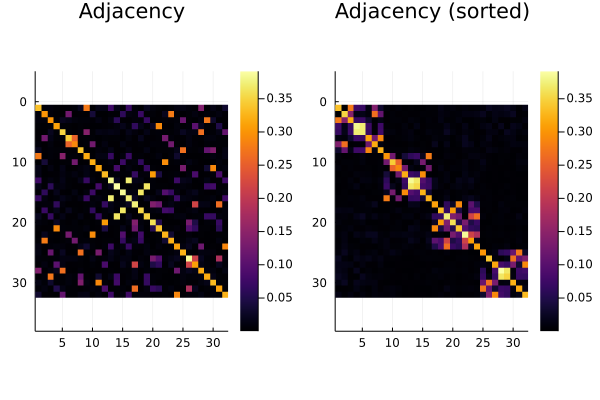

In [4]:
using LinearAlgebra, Printf
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(clustering)
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end

n_clusters = 4
adjacency = abs.(C'*D*C)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 

ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];
C_sorted = C[:,perm]
FermiCG.pyscf_write_molden(mol,C_sorted,filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [5]:
# define clusters
cluster_list = [collect(1:8), collect(9:16), collect(17:24), collect(25:32)]
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]
init_fspace = [ (4,4) for i in 1:n_clusters]
display(clusters)


4-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8])
 Cluster(2, [9, 10, 11, 12, 13, 14, 15, 16])
 Cluster(3, [17, 18, 19, 20, 21, 22, 23, 24])
 Cluster(4, [25, 26, 27, 28, 29, 30, 31, 32])

In [10]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U_cmf, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="gd", sequential=true);

C_cmf = C_sorted * U_cmf
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U_cmf);

 ooCMF Iter:    1 Total= -2754.652791641288 Active= -59.371217768462 G=     1.44e-01
 ooCMF Iter:    2 Total= -2754.659116084982 Active= -59.377542212156 G=     3.32e-02
 ooCMF Iter:    3 Total= -2754.659540863167 Active= -59.377966990342 G=     1.38e-02
 ooCMF Iter:    4 Total= -2754.659612254809 Active= -59.378038381984 G=     7.64e-03
 ooCMF Iter:    5 Total= -2754.659641457527 Active= -59.378067584701 G=     6.58e-03
 ooCMF Iter:    6 Total= -2754.659660521407 Active= -59.378086648581 G=     5.37e-03
 ooCMF Iter:    7 Total= -2754.659675498770 Active= -59.378101625944 G=     5.22e-03
 ooCMF Iter:    8 Total= -2754.659687548029 Active= -59.378113675203 G=     4.33e-03
 ooCMF Iter:    9 Total= -2754.659697286885 Active= -59.378123414059 G=     4.24e-03
 ooCMF Iter:   10 Total= -2754.659705225631 Active= -59.378131352805 G=     3.53e-03
 ooCMF Iter:   11 Total= -2754.659711699776 Active= -59.378137826950 G=     3.48e-03
 ooCMF Iter:   12 Total= -2754.659717030172 Active= -59.378143157

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754660e+03

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.92e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.11e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.68e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.10e-12 ≰ 0.0e+00
    |g(x)|                 = 3.28e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   468  (vs limit Inf)
    Iterations:    50
    f(x) calls:    126
    ∇f(x) calls:   126


*ooCMF -2754.65974487 


In [9]:
ints = ints_cmf
C = C_cmf;
FermiCG.pyscf_write_molden(mol,C_cmf, filename="cmf.molden");

In [ ]:
max_roots = 10


#
# Build Cluster basis
cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, verbose=0, max_roots=max_roots,
        init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);
#
# Build ClusteredOperator
clustered_ham = FermiCG.extract_ClusteredTerms(ints, clusters);

#
# Build Cluster Operators
cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);

#
# Add cmf hamiltonians for doing MP-style PT2 
FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db, verbose=0);

In [ ]:
using JLD2
@save "cmf_data.jld2" ints Da Db e_cmf U_cmf cluster_bases clusters init_fspace